In [1]:
import os

DATA_PATH = "/kaggle/input/datasets/dheerajmg/fundus-1000-images/1000images"

classes = os.listdir(DATA_PATH)
classes = [c for c in classes if os.path.isdir(os.path.join(DATA_PATH, c))]

print("Number of classes:", len(classes))
print("Class names:")
print(classes)


Number of classes: 39
Class names:
['6_Maculopathy', '14_Congenital_disc_abnormality', '4_Rhegmatogenous_RD', '9_Pathological_myopia', '26_Fibrosis', '21_Yellow-white_spots-flecks', '10_1_Optic_atrophy', '0_2_Large_optic_cup', '25_Preretinal_hemorrhage', '11_Severe_hypertensive_retinopathy', '18_Vitreous_particles', '24_Chorioretinal_atrophy-coloboma', '0_1_Tessellated_fundus', '8_MH', '2_0_BRVO', '0_0_Normal', '7_ERM', '5_0_CSCR', '1_0_DR2', '19_Fundus_neoplasm', '12_Disc_swelling_and_elevation', '0_3_DR1', '23_Vessel_tortuosity', '15_0_Retinitis_pigmentosa', '1_1_DR3', '28_Silicon_oil_in_eye', '22_Cotton-wool_spots', '2_1_CRVO', '13_Dragged_Disc', '15_1_Bietti_crystalline_dystrophy', '20_Massive_hard_exudates', '29_0_Blur_fundus_without_PDR', '10_0_Possible_glaucoma', '5_1_VKH_disease', '3_RAO', '27_Laser_Spots', '16_Peripheral_retinal_degeneration_and_break', '17_Myelinated_nerve_fiber', '29_1_Blur_fundus_with_suspected_PDR']


In [2]:
from collections import defaultdict

class_counts = defaultdict(int)

for class_name in classes:
    class_path = os.path.join(DATA_PATH, class_name)
    images = os.listdir(class_path)
    class_counts[class_name] = len(images)

# Print sorted counts
for k, v in sorted(class_counts.items(), key=lambda x: x[1]):
    print(f"{k}: {v}")
    
print("\nTotal images:", sum(class_counts.values()))


19_Fundus_neoplasm: 8
15_1_Bietti_crystalline_dystrophy: 8
14_Congenital_disc_abnormality: 10
26_Fibrosis: 10
25_Preretinal_hemorrhage: 10
22_Cotton-wool_spots: 10
13_Dragged_Disc: 10
17_Myelinated_nerve_fiber: 11
10_1_Optic_atrophy: 12
0_1_Tessellated_fundus: 13
12_Disc_swelling_and_elevation: 13
20_Massive_hard_exudates: 13
10_0_Possible_glaucoma: 13
18_Vitreous_particles: 14
5_0_CSCR: 14
23_Vessel_tortuosity: 14
5_1_VKH_disease: 14
16_Peripheral_retinal_degeneration_and_break: 14
11_Severe_hypertensive_retinopathy: 15
24_Chorioretinal_atrophy-coloboma: 15
3_RAO: 16
0_3_DR1: 18
28_Silicon_oil_in_eye: 19
27_Laser_Spots: 20
15_0_Retinitis_pigmentosa: 22
2_1_CRVO: 22
8_MH: 23
7_ERM: 26
21_Yellow-white_spots-flecks: 29
0_0_Normal: 38
1_1_DR3: 39
2_0_BRVO: 44
29_1_Blur_fundus_with_suspected_PDR: 45
1_0_DR2: 49
0_2_Large_optic_cup: 50
9_Pathological_myopia: 54
4_Rhegmatogenous_RD: 57
6_Maculopathy: 74
29_0_Blur_fundus_without_PDR: 114

Total images: 1000


In [3]:
from PIL import Image

corrupted = []

for class_name in classes:
    class_path = os.path.join(DATA_PATH, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            img.verify()
        except:
            corrupted.append(img_path)

print("Corrupted images:", len(corrupted))


Corrupted images: 0


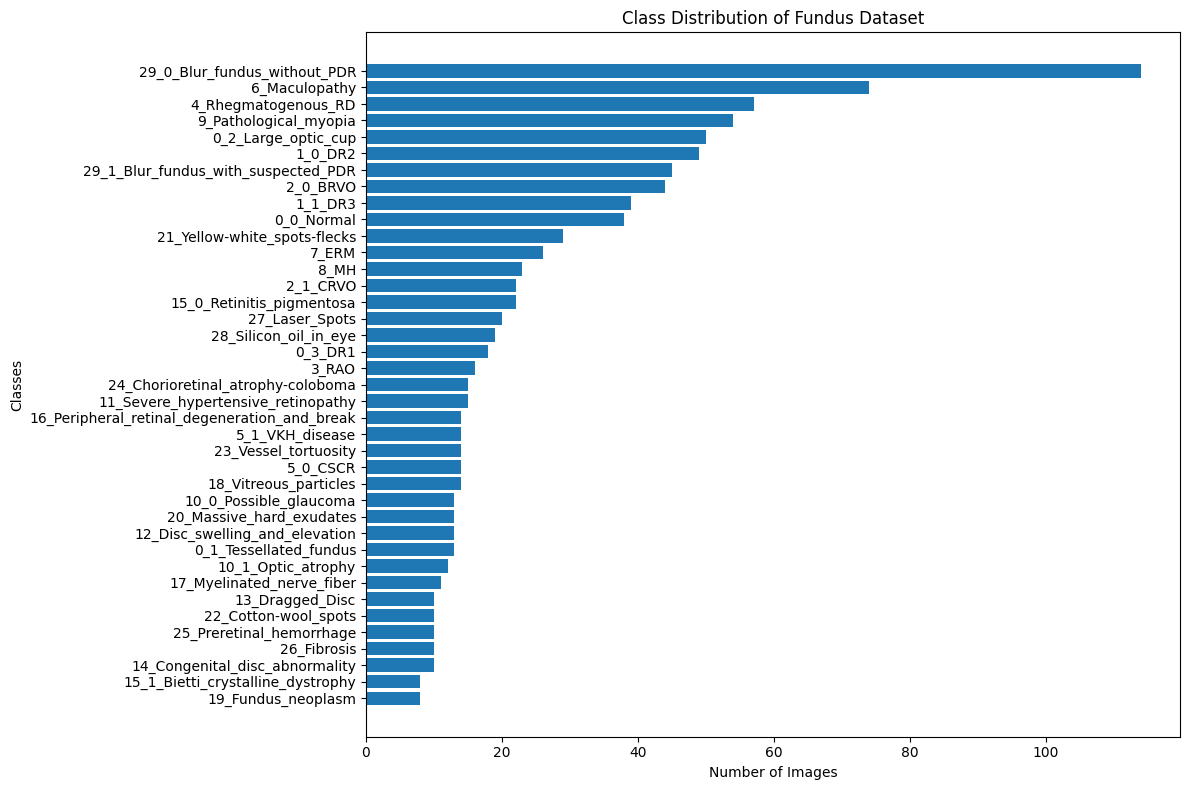

In [4]:
import matplotlib.pyplot as plt

# Sort by count
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1]))

plt.figure(figsize=(12,8))
plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()))
plt.xlabel("Number of Images")
plt.ylabel("Classes")
plt.title("Class Distribution of Fundus Dataset")
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd

data = []

for class_name in classes:
    class_path = os.path.join(DATA_PATH, class_name)
    for img_name in os.listdir(class_path):
        data.append({
            "image_path": os.path.join(class_path, img_name),
            "label": class_name
        })

df = pd.DataFrame(data)

print(df.head())
print("Total samples:", len(df))


                                          image_path          label
0  /kaggle/input/datasets/dheerajmg/fundus-1000-i...  6_Maculopathy
1  /kaggle/input/datasets/dheerajmg/fundus-1000-i...  6_Maculopathy
2  /kaggle/input/datasets/dheerajmg/fundus-1000-i...  6_Maculopathy
3  /kaggle/input/datasets/dheerajmg/fundus-1000-i...  6_Maculopathy
4  /kaggle/input/datasets/dheerajmg/fundus-1000-i...  6_Maculopathy
Total samples: 1000


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

print("Encoded classes:", len(le.classes_))
df.head()


Encoded classes: 39


,image_path,label,label_encoded
0,/kaggle/input/datasets/dheerajmg/fundus-1000-i...,6_Maculopathy,35
1,/kaggle/input/datasets/dheerajmg/fundus-1000-i...,6_Maculopathy,35
2,/kaggle/input/datasets/dheerajmg/fundus-1000-i...,6_Maculopathy,35
3,/kaggle/input/datasets/dheerajmg/fundus-1000-i...,6_Maculopathy,35
4,/kaggle/input/datasets/dheerajmg/fundus-1000-i...,6_Maculopathy,35


In [7]:
# STEP 1: Create DataFrame and Stratified 5-Fold Split

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

data = []

for class_name in classes:
    class_path = os.path.join(DATA_PATH, class_name)
    for img_name in os.listdir(class_path):
        data.append({
            "image_path": os.path.join(class_path, img_name),
            "label": class_name
        })

df = pd.DataFrame(data)

# Encode labels
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

# Create folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
df["fold"] = -1

for fold, (_, val_idx) in enumerate(skf.split(df, df["label_encoded"])):
    df.loc[val_idx, "fold"] = fold

print("Total samples:", len(df))
print("Number of classes:", len(le.classes_))
print(df["fold"].value_counts())


Total samples: 1000
Number of classes: 39
fold
0    200
4    200
1    200
2    200
3    200
Name: count, dtype: int64


In [8]:
# STEP 2: Define Custom PyTorch Dataset

import torch
from torch.utils.data import Dataset
import cv2

class FundusDataset(Dataset):
    def __init__(self, dataframe, transforms=None):
        self.df = dataframe.reset_index(drop=True)
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.loc[idx]
        img_path = row["image_path"]
        label = row["label_encoded"]

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        if self.transforms:
            augmented = self.transforms(image=image)
            image = augmented["image"]

        return image, torch.tensor(label, dtype=torch.long)


In [9]:
# STEP 3: Define Transforms (No Aug and Standard Aug)

import albumentations as A
from albumentations.pytorch import ToTensorV2

# No Augmentation
no_aug_transforms = A.Compose([
    A.Resize(224, 224),
    A.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225)
    ),
    ToTensorV2()
])

# Standard Medical Augmentation
aug_transforms = A.Compose([
    A.Resize(224, 224),
    A.CLAHE(p=0.5),  # good for fundus contrast
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=15, p=0.5),
    A.Affine(scale=(0.95,1.05), translate_percent=(0.05,0.05), p=0.5),
    A.Normalize(
        mean=(0.485, 0.456, 0.406),
        std=(0.229, 0.224, 0.225)
    ),
    ToTensorV2()
])


here we are doing the augumentation and later we are calling this function

In [10]:
# STEP 4: Define DenseNet121 Model Builder

import timm
import torch.nn as nn

def build_model(num_classes=39):
    model = timm.create_model("densenet121", pretrained=True)
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, num_classes)
    return model


/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [11]:
# STEP 5: Define Early Stopping

class EarlyStopping:
    def __init__(self, patience=7):
        self.patience = patience
        self.counter = 0
        self.best_loss = float("inf")
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


In [12]:
# STEP 6: Define Training and Validation Functions

from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
import torch

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0
    all_preds = []
    all_labels = []

    for images, labels in loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss, epoch_acc, epoch_f1


def validate_one_epoch(model, loader, criterion, device):
    model.eval()
    running_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item()

            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / len(loader)
    epoch_acc = accuracy_score(all_labels, all_preds)
    epoch_f1 = f1_score(all_labels, all_preds, average='macro')

    return epoch_loss, epoch_acc, epoch_f1


In [13]:
# STEP 7: 5-Fold Cross Validation - DenseNet121 (No Augmentation)

import numpy as np
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 50
batch_size = 16
patience = 7

fold_accuracies = []
fold_f1_scores = []

for fold in range(5):
    print(f"\n========== FOLD {fold} ==========")
    
    train_df = df[df["fold"] != fold].reset_index(drop=True)
    val_df = df[df["fold"] == fold].reset_index(drop=True)
    
    train_dataset = FundusDataset(train_df, transforms=no_aug_transforms)
    val_dataset = FundusDataset(val_df, transforms=no_aug_transforms)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    model = build_model(num_classes=39).to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)  # L2 Regularization
    
    early_stopping = EarlyStopping(patience=patience)
    
    best_val_loss = float("inf")
    best_val_acc = 0
    best_val_f1 = 0
    
    for epoch in range(num_epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_f1 = validate_one_epoch(model, val_loader, criterion, device)
        
        print(f"Epoch {epoch+1} | "
              f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")
        
        # Save best model
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_acc = val_acc
            best_val_f1 = val_f1
            torch.save(model.state_dict(), f"densenet_noaug_fold{fold}.pth")
        
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    fold_accuracies.append(best_val_acc)
    fold_f1_scores.append(best_val_f1)

print("\n===== FINAL 5-FOLD RESULTS (No Aug) =====")
print("Average Accuracy:", np.mean(fold_accuracies))
print("Std Accuracy:", np.std(fold_accuracies))
print("Average Macro F1:", np.mean(fold_f1_scores))
print("Std Macro F1:", np.std(fold_f1_scores))



========== FOLD 0 ==========


model.safetensors:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

Epoch 1 | Train Acc: 0.2338 | Val Acc: 0.3350 | Val F1: 0.0927
Epoch 2 | Train Acc: 0.4437 | Val Acc: 0.4300 | Val F1: 0.1553
Epoch 3 | Train Acc: 0.6050 | Val Acc: 0.5200 | Val F1: 0.2920
Epoch 4 | Train Acc: 0.7700 | Val Acc: 0.5900 | Val F1: 0.3911
Epoch 5 | Train Acc: 0.9000 | Val Acc: 0.6750 | Val F1: 0.5096
Epoch 6 | Train Acc: 0.9563 | Val Acc: 0.7250 | Val F1: 0.5840
Epoch 7 | Train Acc: 0.9700 | Val Acc: 0.7400 | Val F1: 0.6746
Epoch 8 | Train Acc: 0.9950 | Val Acc: 0.7600 | Val F1: 0.6814
Epoch 9 | Train Acc: 0.9912 | Val Acc: 0.7900 | Val F1: 0.7043
Epoch 10 | Train Acc: 0.9975 | Val Acc: 0.7950 | Val F1: 0.7255
Epoch 11 | Train Acc: 1.0000 | Val Acc: 0.8000 | Val F1: 0.7170
Epoch 12 | Train Acc: 0.9988 | Val Acc: 0.7850 | Val F1: 0.7095
Epoch 13 | Train Acc: 0.9962 | Val Acc: 0.7550 | Val F1: 0.6629
Epoch 14 | Train Acc: 1.0000 | Val Acc: 0.8250 | Val F1: 0.7567
Epoch 15 | Train Acc: 1.0000 | Val Acc: 0.8050 | Val F1: 0.7009
Epoch 16 | Train Acc: 1.0000 | Val Acc: 0.8000 | 

In [14]:
# STEP 8A: Compute Per-Class F1 Across 5 Folds (No Augmentation)

from sklearn.metrics import classification_report
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 39
all_fold_f1 = []

for fold in range(5):
    print(f"\nEvaluating Fold {fold}")
    
    val_df = df[df["fold"] == fold].reset_index(drop=True)
    val_dataset = FundusDataset(val_df, transforms=no_aug_transforms)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
    
    model = build_model(num_classes=39).to(device)
    model.load_state_dict(torch.load(f"densenet_noaug_fold{fold}.pth"))
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    report = classification_report(
        all_labels,
        all_preds,
        output_dict=True,
        zero_division=0
    )
    
    fold_f1 = [report[str(i)]["f1-score"] for i in range(num_classes)]
    all_fold_f1.append(fold_f1)

all_fold_f1 = np.array(all_fold_f1)



Evaluating Fold 0

Evaluating Fold 1

Evaluating Fold 2

Evaluating Fold 3

Evaluating Fold 4


In [15]:
# STEP 8B: Create Final Per-Class Average Table (No Augmentation)

avg_f1_per_class = np.mean(all_fold_f1, axis=0)
std_f1_per_class = np.std(all_fold_f1, axis=0)

class_names = le.classes_

per_class_df = pd.DataFrame({
    "Class": class_names,
    "Average F1": avg_f1_per_class,
    "Std F1": std_f1_per_class
})

per_class_df = per_class_df.sort_values(by="Average F1", ascending=False)

display(per_class_df)


,Class,Average F1,Std F1
14,18_Vitreous_particles,0.960000,0.080000
30,2_1_CRVO,0.960000,0.080000
27,29_0_Blur_fundus_without_PDR,0.956252,0.024489
31,3_RAO,0.949206,0.063014
25,27_Laser_Spots,0.927778,0.098758
38,9_Pathological_myopia,0.927304,0.077288
29,2_0_BRVO,0.925608,0.034317
26,28_Silicon_oil_in_eye,0.914286,0.171429
37,8_MH,0.913247,0.078793
34,5_1_VKH_disease,0.904762,0.131277


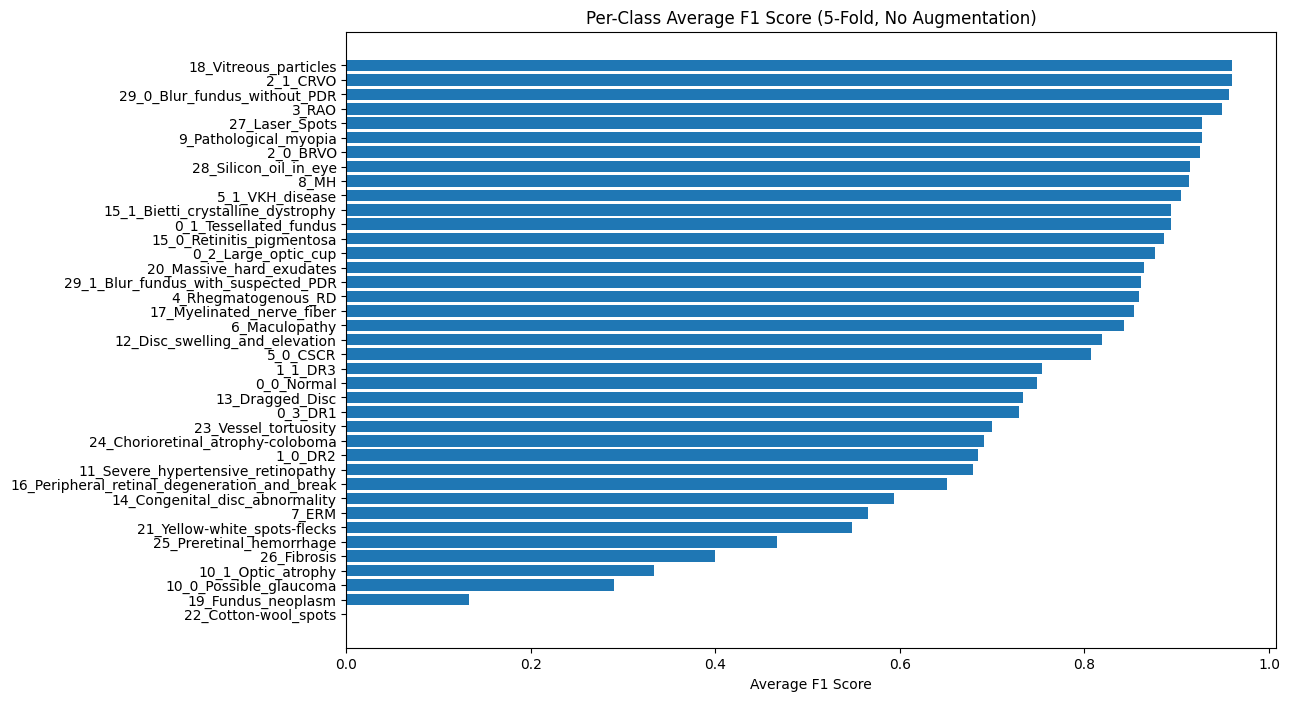

In [16]:
# STEP 8C: Plot Per-Class F1 Scores (No Augmentation)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.barh(per_class_df["Class"], per_class_df["Average F1"])
plt.xlabel("Average F1 Score")
plt.title("Per-Class Average F1 Score (5-Fold, No Augmentation)")
plt.gca().invert_yaxis()
plt.show()


In [17]:
# STEP 9A: Collect Per-Class Precision, Recall and F1 Across 5 Folds (No Aug)

from sklearn.metrics import classification_report
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 39

all_precision = []
all_recall = []
all_f1 = []

for fold in range(5):
    print(f"Evaluating Fold {fold}")
    
    val_df = df[df["fold"] == fold].reset_index(drop=True)
    val_dataset = FundusDataset(val_df, transforms=no_aug_transforms)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
    
    model = build_model(num_classes=39).to(device)
    model.load_state_dict(torch.load(f"densenet_noaug_fold{fold}.pth"))
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    report = classification_report(
        all_labels,
        all_preds,
        output_dict=True,
        zero_division=0
    )
    
    fold_precision = [report[str(i)]["precision"] for i in range(num_classes)]
    fold_recall = [report[str(i)]["recall"] for i in range(num_classes)]
    fold_f1 = [report[str(i)]["f1-score"] for i in range(num_classes)]
    
    all_precision.append(fold_precision)
    all_recall.append(fold_recall)
    all_f1.append(fold_f1)

all_precision = np.array(all_precision)
all_recall = np.array(all_recall)
all_f1 = np.array(all_f1)


Evaluating Fold 0
Evaluating Fold 1
Evaluating Fold 2
Evaluating Fold 3
Evaluating Fold 4


In [18]:
# STEP 9B: Create Final Per-Class Performance Table (5-Fold No Aug)

avg_precision = np.mean(all_precision, axis=0)
std_precision = np.std(all_precision, axis=0)

avg_recall = np.mean(all_recall, axis=0)
std_recall = np.std(all_recall, axis=0)

avg_f1 = np.mean(all_f1, axis=0)
std_f1 = np.std(all_f1, axis=0)

per_class_full_df = pd.DataFrame({
    "Class": le.classes_,
    "Avg Precision": avg_precision,
    "Std Precision": std_precision,
    "Avg Recall (Class Accuracy)": avg_recall,
    "Std Recall": std_recall,
    "Avg F1": avg_f1,
    "Std F1": std_f1
})

per_class_full_df = per_class_full_df.sort_values(by="Avg F1", ascending=False)

display(per_class_full_df)


,Class,Avg Precision,Std Precision,Avg Recall (Class Accuracy),Std Recall,Avg F1,Std F1
14,18_Vitreous_particles,1.000000,0.000000,0.933333,0.133333,0.960000,0.080000
30,2_1_CRVO,0.960000,0.080000,0.960000,0.080000,0.960000,0.080000
27,29_0_Blur_fundus_without_PDR,0.949114,0.030184,0.964427,0.033817,0.956252,0.024489
31,3_RAO,0.910000,0.111355,1.000000,0.000000,0.949206,0.063014
25,27_Laser_Spots,0.910000,0.111355,0.950000,0.100000,0.927778,0.098758
38,9_Pathological_myopia,0.883333,0.115274,0.981818,0.036364,0.927304,0.077288
29,2_0_BRVO,0.980000,0.040000,0.883333,0.079349,0.925608,0.034317
26,28_Silicon_oil_in_eye,0.933333,0.133333,0.900000,0.200000,0.914286,0.171429
37,8_MH,0.926667,0.090431,0.910000,0.111355,0.913247,0.078793
34,5_1_VKH_disease,0.883333,0.145297,0.933333,0.133333,0.904762,0.131277


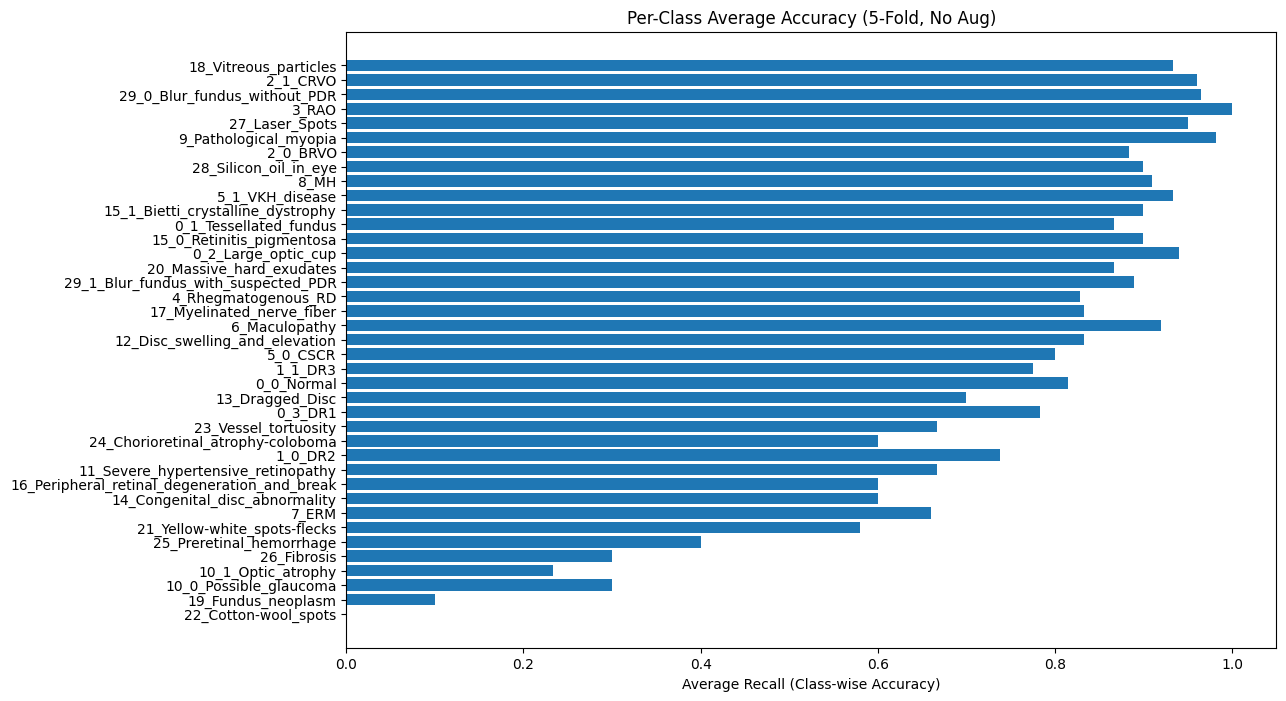

In [19]:
# STEP 9C: Plot Per-Class Recall (Class-wise Accuracy)

plt.figure(figsize=(12,8))
plt.barh(per_class_full_df["Class"], per_class_full_df["Avg Recall (Class Accuracy)"])
plt.xlabel("Average Recall (Class-wise Accuracy)")
plt.title("Per-Class Average Accuracy (5-Fold, No Aug)")
plt.gca().invert_yaxis()
plt.show()


In [20]:
# STEP 10: 5-Fold Cross Validation - DenseNet121 (With Augmentation)

import numpy as np
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 50
batch_size = 16
patience = 7

fold_accuracies_aug = []
fold_f1_scores_aug = []

for fold in range(5):
    print(f"\n========== FOLD {fold} (AUG) ==========")
    
    train_df = df[df["fold"] != fold].reset_index(drop=True)
    val_df = df[df["fold"] == fold].reset_index(drop=True)
    
    train_dataset = FundusDataset(train_df, transforms=aug_transforms)
    val_dataset = FundusDataset(val_df, transforms=no_aug_transforms)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    model = build_model(num_classes=39).to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)
    
    early_stopping = EarlyStopping(patience=patience)
    
    best_val_loss = float("inf")
    best_val_acc = 0
    best_val_f1 = 0
    
    for epoch in range(num_epochs):
        train_loss, train_acc, train_f1 = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_f1 = validate_one_epoch(model, val_loader, criterion, device)
        
        print(f"Epoch {epoch+1} | "
              f"Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_val_acc = val_acc
            best_val_f1 = val_f1
            torch.save(model.state_dict(), f"densenet_aug_fold{fold}.pth")
        
        early_stopping(val_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered.")
            break
    
    fold_accuracies_aug.append(best_val_acc)
    fold_f1_scores_aug.append(best_val_f1)

print("\n===== FINAL 5-FOLD RESULTS (With Aug) =====")
print("Average Accuracy:", np.mean(fold_accuracies_aug))
print("Std Accuracy:", np.std(fold_accuracies_aug))
print("Average Macro F1:", np.mean(fold_f1_scores_aug))
print("Std Macro F1:", np.std(fold_f1_scores_aug))



========== FOLD 0 (AUG) ==========
Epoch 1 | Train Acc: 0.1663 | Val Acc: 0.3150 | Val F1: 0.0828
Epoch 2 | Train Acc: 0.3650 | Val Acc: 0.4250 | Val F1: 0.1748
Epoch 3 | Train Acc: 0.4875 | Val Acc: 0.5400 | Val F1: 0.2589
Epoch 4 | Train Acc: 0.5950 | Val Acc: 0.6150 | Val F1: 0.3446
Epoch 5 | Train Acc: 0.7075 | Val Acc: 0.7000 | Val F1: 0.4896
Epoch 6 | Train Acc: 0.7850 | Val Acc: 0.7750 | Val F1: 0.6276
Epoch 7 | Train Acc: 0.8588 | Val Acc: 0.7950 | Val F1: 0.6738
Epoch 8 | Train Acc: 0.8850 | Val Acc: 0.8250 | Val F1: 0.7211
Epoch 9 | Train Acc: 0.9250 | Val Acc: 0.8300 | Val F1: 0.7401
Epoch 10 | Train Acc: 0.9375 | Val Acc: 0.8450 | Val F1: 0.7669
Epoch 11 | Train Acc: 0.9563 | Val Acc: 0.8700 | Val F1: 0.8008
Epoch 12 | Train Acc: 0.9688 | Val Acc: 0.8550 | Val F1: 0.7931
Epoch 13 | Train Acc: 0.9650 | Val Acc: 0.8700 | Val F1: 0.8206
Epoch 14 | Train Acc: 0.9800 | Val Acc: 0.8900 | Val F1: 0.8722
Epoch 15 | Train Acc: 0.9862 | Val Acc: 0.8800 | Val F1: 0.8503
Epoch 16 | Tr

In [21]:
# STEP 11: Compute Per-Class Metrics Across 5 Folds (With Augmentation)

from sklearn.metrics import classification_report
import numpy as np
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = 39

all_precision_aug = []
all_recall_aug = []
all_f1_aug = []

for fold in range(5):
    print(f"Evaluating Fold {fold} (AUG)")
    
    val_df = df[df["fold"] == fold].reset_index(drop=True)
    val_dataset = FundusDataset(val_df, transforms=no_aug_transforms)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, num_workers=2)
    
    model = build_model(num_classes=39).to(device)
    model.load_state_dict(torch.load(f"densenet_aug_fold{fold}.pth"))
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    
    report = classification_report(
        all_labels,
        all_preds,
        output_dict=True,
        zero_division=0
    )
    
    fold_precision = [report[str(i)]["precision"] for i in range(num_classes)]
    fold_recall = [report[str(i)]["recall"] for i in range(num_classes)]
    fold_f1 = [report[str(i)]["f1-score"] for i in range(num_classes)]
    
    all_precision_aug.append(fold_precision)
    all_recall_aug.append(fold_recall)
    all_f1_aug.append(fold_f1)

all_precision_aug = np.array(all_precision_aug)
all_recall_aug = np.array(all_recall_aug)
all_f1_aug = np.array(all_f1_aug)


Evaluating Fold 0 (AUG)
Evaluating Fold 1 (AUG)
Evaluating Fold 2 (AUG)
Evaluating Fold 3 (AUG)
Evaluating Fold 4 (AUG)


In [22]:
# STEP 12: Compare Per-Class F1 (No Aug vs Aug)

avg_f1_noaug = np.mean(all_f1, axis=0)
avg_f1_aug = np.mean(all_f1_aug, axis=0)

improvement = avg_f1_aug - avg_f1_noaug

comparison_df = pd.DataFrame({
    "Class": le.classes_,
    "F1_No_Aug": avg_f1_noaug,
    "F1_With_Aug": avg_f1_aug,
    "Improvement": improvement
})

comparison_df = comparison_df.sort_values(by="Improvement", ascending=False)

display(comparison_df)


,Class,F1_No_Aug,F1_With_Aug,Improvement
20,22_Cotton-wool_spots,0.000000,0.493333,0.493333
5,10_1_Optic_atrophy,0.333333,0.693333,0.360000
9,14_Congenital_disc_abnormality,0.593333,0.933333,0.340000
24,26_Fibrosis,0.400000,0.700000,0.300000
12,16_Peripheral_retinal_degeneration_and_break,0.651429,0.933333,0.281905
4,10_0_Possible_glaucoma,0.290476,0.554286,0.263810
36,7_ERM,0.565320,0.796970,0.231650
21,23_Vessel_tortuosity,0.700000,0.920000,0.220000
8,13_Dragged_Disc,0.733333,0.933333,0.200000
22,24_Chorioretinal_atrophy-coloboma,0.691429,0.891429,0.200000


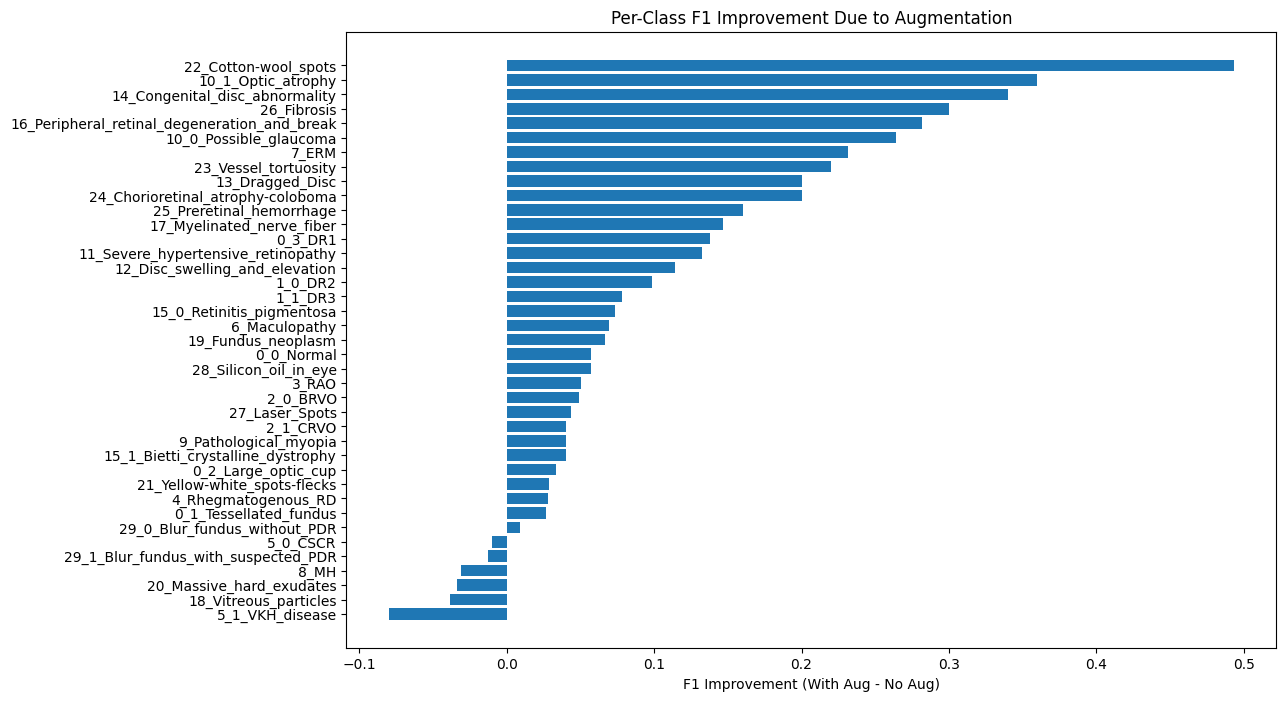

In [23]:
# STEP 13: Plot Per-Class F1 Improvement

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.barh(comparison_df["Class"], comparison_df["Improvement"])
plt.xlabel("F1 Improvement (With Aug - No Aug)")
plt.title("Per-Class F1 Improvement Due to Augmentation")
plt.gca().invert_yaxis()
plt.show()


In [24]:
# STEP 14: Final Global Performance Comparison Table

import pandas as pd
import numpy as np

results_summary = pd.DataFrame({
    "Model": ["DenseNet121", "DenseNet121"],
    "Augmentation": ["No", "Yes"],
    "Avg Accuracy": [
        np.mean(fold_accuracies),
        np.mean(fold_accuracies_aug)
    ],
    "Std Accuracy": [
        np.std(fold_accuracies),
        np.std(fold_accuracies_aug)
    ],
    "Avg Macro F1": [
        np.mean(fold_f1_scores),
        np.mean(fold_f1_scores_aug)
    ],
    "Std Macro F1": [
        np.std(fold_f1_scores),
        np.std(fold_f1_scores_aug)
    ]
})

display(results_summary)


,Model,Augmentation,Avg Accuracy,Std Accuracy,Avg Macro F1,Std Macro F1
0,DenseNet121,No,0.814,0.013928,0.730736,0.023976
1,DenseNet121,Yes,0.880,0.025495,0.840163,0.033368


In [25]:
# STEP 15: Add Percentage Improvement

accuracy_improvement = (
    (results_summary.loc[1, "Avg Accuracy"] - results_summary.loc[0, "Avg Accuracy"])
    / results_summary.loc[0, "Avg Accuracy"]
) * 100

f1_improvement = (
    (results_summary.loc[1, "Avg Macro F1"] - results_summary.loc[0, "Avg Macro F1"])
    / results_summary.loc[0, "Avg Macro F1"]
) * 100

print("Accuracy Improvement (%):", round(accuracy_improvement, 2))
print("Macro F1 Improvement (%):", round(f1_improvement, 2))


Accuracy Improvement (%): 8.11
Macro F1 Improvement (%): 14.97


In [26]:
# STEP 16: Final Per-Class Comparison Table

import pandas as pd
import numpy as np

# Average metrics across folds
avg_f1_noaug = np.mean(all_f1, axis=0)
avg_f1_aug = np.mean(all_f1_aug, axis=0)

avg_recall_noaug = np.mean(all_recall, axis=0)
avg_recall_aug = np.mean(all_recall_aug, axis=0)

# Create comparison dataframe
final_comparison_df = pd.DataFrame({
    "Class": le.classes_,
    "F1_No_Aug": avg_f1_noaug,
    "F1_With_Aug": avg_f1_aug,
    "F1_Improvement": avg_f1_aug - avg_f1_noaug,
    "Recall_No_Aug": avg_recall_noaug,
    "Recall_With_Aug": avg_recall_aug,
    "Recall_Improvement": avg_recall_aug - avg_recall_noaug
})

# Sort by improvement
final_comparison_df = final_comparison_df.sort_values(by="F1_Improvement", ascending=False)

display(final_comparison_df)


,Class,F1_No_Aug,F1_With_Aug,F1_Improvement,Recall_No_Aug,Recall_With_Aug,Recall_Improvement
20,22_Cotton-wool_spots,0.000000,0.493333,0.493333,0.000000,0.500000,0.500000
5,10_1_Optic_atrophy,0.333333,0.693333,0.360000,0.233333,0.666667,0.433333
9,14_Congenital_disc_abnormality,0.593333,0.933333,0.340000,0.600000,0.900000,0.300000
24,26_Fibrosis,0.400000,0.700000,0.300000,0.300000,0.600000,0.300000
12,16_Peripheral_retinal_degeneration_and_break,0.651429,0.933333,0.281905,0.600000,0.933333,0.333333
4,10_0_Possible_glaucoma,0.290476,0.554286,0.263810,0.300000,0.533333,0.233333
36,7_ERM,0.565320,0.796970,0.231650,0.660000,0.893333,0.233333
21,23_Vessel_tortuosity,0.700000,0.920000,0.220000,0.666667,0.866667,0.200000
8,13_Dragged_Disc,0.733333,0.933333,0.200000,0.700000,0.900000,0.200000
22,24_Chorioretinal_atrophy-coloboma,0.691429,0.891429,0.200000,0.600000,0.866667,0.266667
